<a href="https://colab.research.google.com/github/Do-Nhat-Truong/AI-VietNam-Module5-week1/blob/main/Module5Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA

Downloading...
From: https://drive.google.com/uc?id=1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA
To: /content/titanic_modified_dataset.csv
100% 25.9k/25.9k [00:00<00:00, 42.1MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler

In [4]:
dataset_path= 'titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path,
index_col = 'PassengerId'
)

df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [7]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

In [9]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
X_b

array([[ 1.    ,  3.    ,  0.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , ..., 71.2833,  1.    ,  1.    ],
       [ 1.    ,  3.    ,  1.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  3.    ,  1.    , ..., 23.45  ,  0.    ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ..., 30.    ,  1.    ,  0.    ],
       [ 1.    ,  3.    ,  0.    , ...,  7.75  ,  2.    ,  0.    ]])

In [11]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)
print(X_train.shape, X_val.shape, X_test.shape)

(623, 9) (179, 9) (89, 9)


In [12]:
normalizer = StandardScaler()

X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])


In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)

    return y_hat


def compute_loss(y, y_hat):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)

    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()


def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size


def update_theta(theta, gradient, lr):
    return theta - lr * gradient


def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()

    return acc


In [21]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [22]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []


for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i: i + batch_size]
        y_i = y_train[i: i + batch_size]

        # Dự đoán và tính toán mất mát, gradient cho batch
        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_i, y_hat)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        # Lưu mất mát và độ chính xác cho batch hiện tại
        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_i, y_i, theta)
        train_batch_accs.append(train_acc)

    # Dự đoán và tính toán mất mát, độ chính xác cho tập xác nhận
    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val, y_val_hat)
    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_losses.append(val_loss)
    val_batch_accs.append(val_acc)

    # Tính mất mát và độ chính xác trung bình cho mỗi epoch
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    # Lưu lại kết quả của epoch
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    # In kết quả của epoch hiện tại
    print(f'EPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.703	Validation loss: 0.590
EPOCH 2:	Training loss: 0.670	Validation loss: 0.574
EPOCH 3:	Training loss: 0.640	Validation loss: 0.560
EPOCH 4:	Training loss: 0.614	Validation loss: 0.549
EPOCH 5:	Training loss: 0.592	Validation loss: 0.539
EPOCH 6:	Training loss: 0.572	Validation loss: 0.531
EPOCH 7:	Training loss: 0.554	Validation loss: 0.524
EPOCH 8:	Training loss: 0.539	Validation loss: 0.519
EPOCH 9:	Training loss: 0.526	Validation loss: 0.514
EPOCH 10:	Training loss: 0.514	Validation loss: 0.511
EPOCH 11:	Training loss: 0.504	Validation loss: 0.508
EPOCH 12:	Training loss: 0.495	Validation loss: 0.506
EPOCH 13:	Training loss: 0.487	Validation loss: 0.504
EPOCH 14:	Training loss: 0.480	Validation loss: 0.503
EPOCH 15:	Training loss: 0.474	Validation loss: 0.502
EPOCH 16:	Training loss: 0.468	Validation loss: 0.501
EPOCH 17:	Training loss: 0.463	Validation loss: 0.500
EPOCH 18:	Training loss: 0.459	Validation loss: 0.500
EPOCH 19:	Training loss: 0.455	Valida

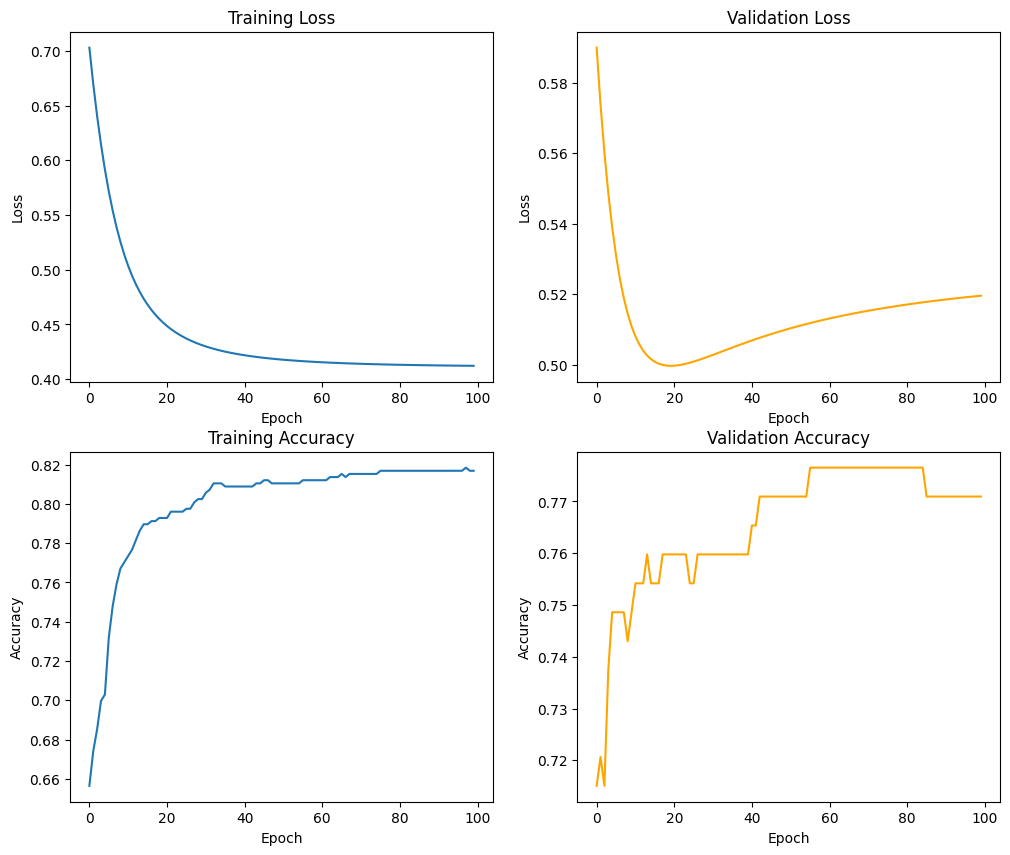

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Vẽ biểu đồ Loss trên tập huấn luyện
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Vẽ biểu đồ Loss trên tập xác nhận
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Vẽ biểu đồ Accuracy trên tập huấn luyện
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Vẽ biểu đồ Accuracy trên tập xác nhận
ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

# Hiển thị các biểu đồ
plt.show()


In [24]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print('Evaluation on validation and test set:')
print(f'Validation Accuracy: {val_set_acc:.3f}')
print(f'Test Accuracy: {test_set_acc:.3f}')


Evaluation on validation and test set:
Validation Accuracy: 0.771
Test Accuracy: 0.775


In [27]:
!gdown 1u_lWZPAVIdWG2gsi5myYhdtMoJ3MP0_j
!unzip twitter_sentiment_analysis_2cls_dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1u_lWZPAVIdWG2gsi5myYhdtMoJ3MP0_j
To: /content/twitter_sentiment_analysis_2cls_dataset.zip
100% 471k/471k [00:00<00:00, 82.4MB/s]
Archive:  twitter_sentiment_analysis_2cls_dataset.zip
  inflating: sentiment_analysis.csv  


In [28]:
import pandas as pd
import numpy as np

import re
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict


In [30]:
dataset_path= 'sentiment_analysis.csv'
df = pd.read_csv(dataset_path,
index_col = 'id'
)
df

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
...,...,...
7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,0,We would like to wish you an amazing day! Make...
7918,0,Helping my lovely 90 year old neighbor with he...


In [32]:
def text_normalize(text):

    # Loại bỏ từ "RT" (viết tắt của Retweet) ở đầu dòng
    text = re.sub(r'^RT[\s]+', '', text)

    # Loại bỏ các hyperlink
    text = re.sub(r'https?://[^\s\r\n]+', '', text)

    # Loại bỏ các hashtag
    text = re.sub(r'#\S+', '', text)

    # Loại bỏ các ký tự đặc biệt không phải chữ và số
    text = re.sub(r'[^\w\s]', ' ', text)

    # Tokenization
    tokenizer = TweetTokenizer(
        preserve_case=False,
        strip_handles=True,
        reduce_len=True
    )
    text_tokens = tokenizer.tokenize(text)

    return text_tokens


In [33]:
def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']

        tokens = text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1

    return freqs


In [35]:
def get_feature(text, freqs):
    tokens = text_normalize(text)
    X = np.zeros(3)
    X[0] = 1  # Bias term

    for token in tokens:
        X[1] += freqs[(token, 0)]
        X[2] += freqs[(token, 1)]

    return X


In [36]:
X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    X_i = get_feature(tweet, freqs)
    X.append(X_i)
    y.append(label)

X = np.array(X)
y = np.array(y)


In [40]:
X.shape, y.shape

((7920, 3), (7920,))

In [41]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

# Chia dữ liệu thành tập huấn luyện và tập xác nhận
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

# Chia tiếp tập huấn luyện thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)


In [42]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])


In [44]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_hat):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)  # Clip để tránh log(0) lỗi
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc


In [47]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])


In [48]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []


for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i: i + batch_size]
        y_i = y_train[i: i + batch_size]

        # Dự đoán và tính toán mất mát, gradient cho batch
        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_i, y_hat)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        # Lưu mất mát và độ chính xác cho batch hiện tại
        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_i, y_i, theta)
        train_batch_accs.append(train_acc)

    # Dự đoán và tính toán mất mát, độ chính xác cho tập xác nhận
    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val, y_val_hat)
    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_losses.append(val_loss)
    val_batch_accs.append(val_acc)

    # Tính mất mát và độ chính xác trung bình cho mỗi epoch
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    # Lưu lại kết quả của epoch
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    # In kết quả của epoch hiện tại
    print(f'EPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.697	Validation loss: 0.673
EPOCH 2:	Training loss: 0.649	Validation loss: 0.631
EPOCH 3:	Training loss: 0.612	Validation loss: 0.598
EPOCH 4:	Training loss: 0.581	Validation loss: 0.571
EPOCH 5:	Training loss: 0.557	Validation loss: 0.550
EPOCH 6:	Training loss: 0.537	Validation loss: 0.532
EPOCH 7:	Training loss: 0.521	Validation loss: 0.517
EPOCH 8:	Training loss: 0.508	Validation loss: 0.505
EPOCH 9:	Training loss: 0.497	Validation loss: 0.494
EPOCH 10:	Training loss: 0.487	Validation loss: 0.486
EPOCH 11:	Training loss: 0.479	Validation loss: 0.478
EPOCH 12:	Training loss: 0.472	Validation loss: 0.472
EPOCH 13:	Training loss: 0.467	Validation loss: 0.467
EPOCH 14:	Training loss: 0.462	Validation loss: 0.462
EPOCH 15:	Training loss: 0.458	Validation loss: 0.458
EPOCH 16:	Training loss: 0.454	Validation loss: 0.455
EPOCH 17:	Training loss: 0.451	Validation loss: 0.452
EPOCH 18:	Training loss: 0.448	Validation loss: 0.449
EPOCH 19:	Training loss: 0.446	Valida

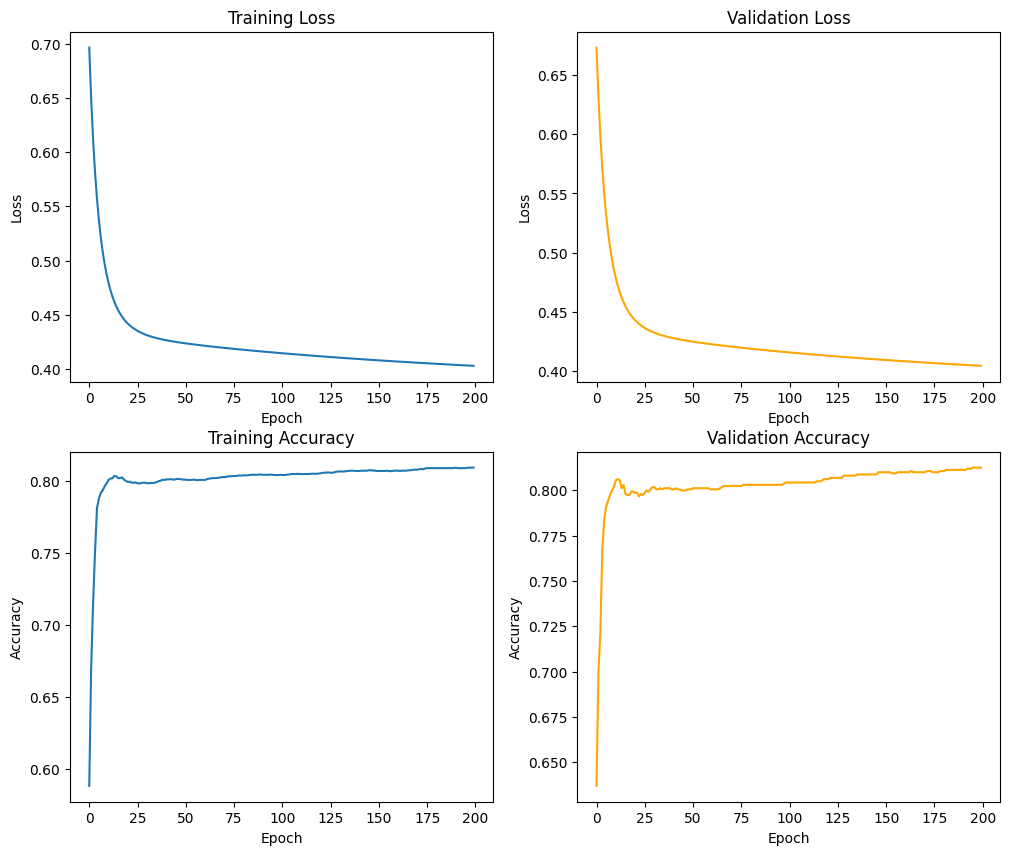

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Vẽ biểu đồ Loss trên tập huấn luyện
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

# Vẽ biểu đồ Loss trên tập xác nhận
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

# Vẽ biểu đồ Accuracy trên tập huấn luyện
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

# Vẽ biểu đồ Accuracy trên tập xác nhận
ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

# Hiển thị các biểu đồ
plt.show()

In [50]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print('Evaluation on validation and test set:')
print(f'Validation Accuracy: {val_set_acc:.3f}')
print(f'Test Accuracy: {test_set_acc:.3f}')


Evaluation on validation and test set:
Validation Accuracy: 0.812
Test Accuracy: 0.826


In [10]:
import numpy as np


def predict(X, theta):
    z = np.dot(X, theta)

    return 1/(1+np.exp(-z))

X = [[22.3, -1.5, 1.1, 1]]
theta = [0.1, -0.15, 0.3, -0.2]


y_hat = predict(X, theta)
print(y_hat)
#

[0.92988994]


In [11]:
def compute_loss(y, y_hat):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)  # Clip để tránh log(0) lỗi
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()


y = np.array([1, 0, 0, 1])
y_hat = np.array([0.8, 0.75, 0.3,0.95])
loss = compute_loss(y, y_hat)
print(loss)

0.5043515376900958


In [15]:

def compute_gradient(X, y_true, y_pred):
  gradient = np. dot (X.T, ( y_pred - y_true ) ) / y_true . size
  return gradient



X = [[1, 2], [2, 1], [1, 1], [2, 2]]
y_true = [0, 1, 0, 1]
y_pred = [0.25, 0.75,0.4, 0.8]

X = np.array(X)
y_true = np.array(y_true)
y_pred = np.array(y_pred)
gradient = compute_gradient(X, y_true, y_pred)
print(gradient)

[-0.0625  0.0625]


In [20]:
def compute_accuracy(X, y):
    y_pred_rounded = np.round( y_pred )
    accuracy = np.mean(y_true == y_pred_rounded )
    return accuracy

y_true = [1, 0, 1, 1]
y_pred = [0.85, 0.35, 0.9, 0.75]
accuracy = compute_accuracy(y_true, y_pred)
print(accuracy)

1.0


In [22]:
def compute_gradient(X, y_true, y_pred):
  gradient = np.dot(X.T, ( y_pred - y_true ) ) / y_true.size
  return gradient

X = [[1, 3], [2, 1], [3, 2], [1, 2]]
y_true = [1, 0, 1, 1]
y_pred = [0.7, 0.4,0.6, 0.85]

X = np.array(X)
y_true = np.array(y_true)
y_pred = np.array(y_pred)
gradient = compute_gradient(X, y_true, y_pred)
print(gradient)

[-0.2125 -0.4   ]
